<a href="https://colab.research.google.com/github/rrizwan98/Dr.-Dinish-/blob/main/medium_risk_factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
data=pd.read_csv('/content/medium risk factor.csv')
data.head()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor che1otherap1,Associated 0actor SSRI,Associated 0actor Bowel op,1edical histor1 autoi11u0e,1edical histor1 clostridiu1,1edical histor1 Th1roid,Social histor1 s1oki0g,Social histor1 Alcohol,label
0,26,0,1,1,1,0,0,1,1,1,0
1,62,0,0,1,1,0,0,0,0,0,0
2,69,1,1,1,1,0,1,1,1,0,0
3,59,0,0,0,0,1,1,0,0,0,0
4,79,0,0,1,0,1,0,0,0,1,0


In [3]:

print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [4]:
print("Number of cells with null values: " , data.isnull().sum().sum())

Number of cells with null values:  0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Patie0t De1ographic age          1293 non-null   int64
 1   Patie0t De1ographic ge0der       1293 non-null   int64
 2   Associated 0actor che1otherap1   1293 non-null   int64
 3   Associated 0actor SSRI           1293 non-null   int64
 4   Associated 0actor Bowel op       1293 non-null   int64
 5   1edical histor1 autoi11u0e       1293 non-null   int64
 6   1edical histor1 clostridiu1      1293 non-null   int64
 7   1edical histor1 Th1roid          1293 non-null   int64
 8   Social histor1 s1oki0g           1293 non-null   int64
 9   Social histor1 Alcohol           1293 non-null   int64
 10  label                            1293 non-null   int64
dtypes: int64(11)
memory usage: 111.2 KB


In [6]:
data.describe()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor che1otherap1,Associated 0actor SSRI,Associated 0actor Bowel op,1edical histor1 autoi11u0e,1edical histor1 clostridiu1,1edical histor1 Th1roid,Social histor1 s1oki0g,Social histor1 Alcohol,label
count,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000,1293.000000
mean,56.552204,0.432328,0.248260,0.320959,0.225058,0.236659,0.232792,0.224285,0.281516,0.239753,0.614076
std,16.858492,0.495591,0.432171,0.467026,0.417782,0.425196,0.422774,0.417272,0.449912,0.427098,0.487001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,69.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


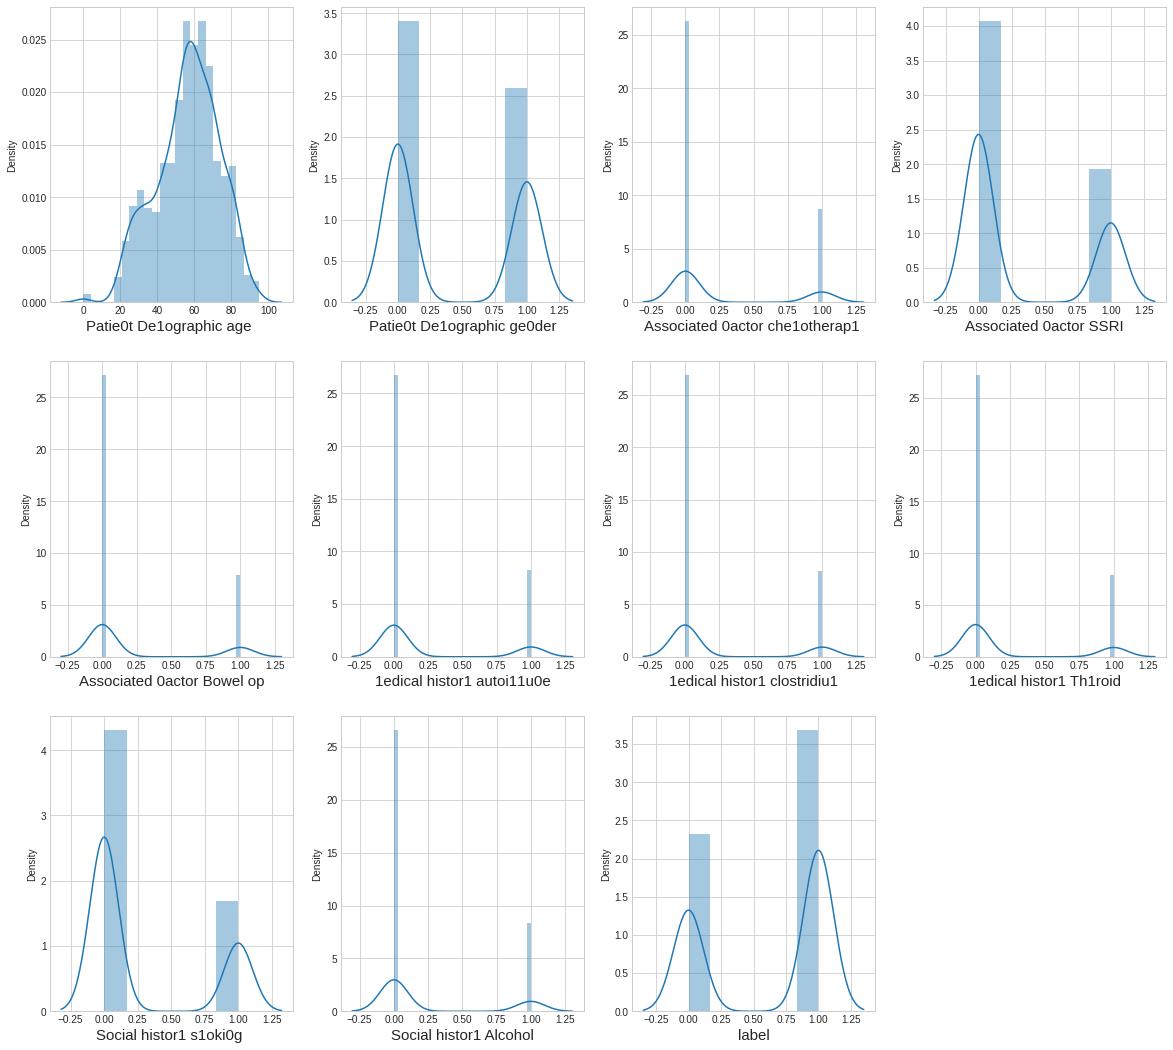

In [7]:
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [8]:
data["label"].value_counts()

1    794
0    499
Name: label, dtype: int64

In [9]:
# data shuffling frac=1 mean 100% shuffle 
data = data.sample(frac = 1)
data.head()

,Patie0t De1ographic age,Patie0t De1ographic ge0der,Associated 0actor che1otherap1,Associated 0actor SSRI,Associated 0actor Bowel op,1edical histor1 autoi11u0e,1edical histor1 clostridiu1,1edical histor1 Th1roid,Social histor1 s1oki0g,Social histor1 Alcohol,label
1012,63,0,1,0,0,0,0,1,1,1,1
201,63,0,1,1,0,1,1,1,0,0,0
1263,39,1,0,0,0,0,0,0,0,0,1
55,35,1,0,0,0,0,1,1,1,0,0
282,59,0,0,0,1,0,0,0,0,0,0


In [10]:

print("Number of cells with null values: " , data.duplicated().sum())

Number of cells with null values:  306


In [11]:
data[["Patie0t De1ographic ge0der","label"]].groupby(["Patie0t De1ographic ge0der"], as_index = False).mean()

,Patie0t De1ographic ge0der,label
0,0,0.611717
1,1,0.617174


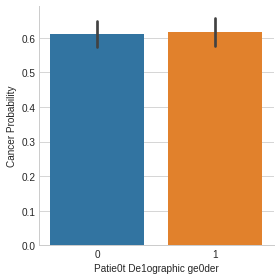

In [12]:
g = sns.factorplot(x = "Patie0t De1ographic ge0der", y = "label", data = data, kind = "bar", size = 4)
g.set_ylabels("Cancer Probability")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
# Models:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evolution:
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
X = data.drop(["label"], axis=1)
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42 ) #test-train data split - 20/80
#X_train[0:10]  #eğitim setinin ilk 10 satırı
print("X_train : ",len(X_train))
print("X_test : ",len(X_test))
print("y_train : ",len(y_train))
print("y_test : ",len(y_test))

X_train :  1034
X_test :  259
y_train :  1034
y_test :  259


In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_train.values)

(1034, 10)
(259, 10)
[[42  1  0 ...  0  1  0]
 [39  1  0 ...  0  0  0]
 [83  0  0 ...  0  1  1]
 ...
 [82  1  0 ...  1  1  1]
 [69  1  0 ...  0  0  0]
 [56  1  0 ...  0  1  1]]


In [16]:
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
models = [("LR", LogisticRegression(max_iter=1000)),
          ("SVC", SVC()),
          ("KNC", KNeighborsClassifier(n_neighbors=10)),
          ("DTC", DecisionTreeClassifier()),
          ("GNB", GaussianNB()),
         ("SGDC", SGDClassifier()),
         ("Perc", Perceptron()),
          ("NC", NearestCentroid()),
          ("Ridge", RidgeClassifier()),
          ("BNB", BernoulliNB()),
          ("RF", RandomForestClassifier()),
          ("ADA", AdaBoostClassifier()),
          ("XGB", GradientBoostingClassifier()),
          ("PAC", PassiveAggressiveClassifier()) 
    
]

results = []
names=[]
finalresults=[]

for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score= precision_score(y_test, model_results, average='macro')
    results.append(score)
    names.append(name)
    finalresults.append((name,score))
finalresults.sort(key=lambda k:k[1], reverse=True)
finalresults

[('XGB', 0.8893743931197114),
 ('RF', 0.8687363088718509),
 ('DTC', 0.8278571428571428),
 ('GNB', 0.7357612267250822),
 ('Ridge', 0.7350445786597641),
 ('BNB', 0.727027027027027),
 ('LR', 0.7164222030486052),
 ('ADA', 0.7071110152430256),
 ('SGDC', 0.7033195020746887),
 ('PAC', 0.6588652482269504),
 ('KNC', 0.6450077200205867),
 ('Perc', 0.5110236220472442),
 ('NC', 0.48948190888327925),
 ('SVC', 0.3108108108108108)]

In [18]:
# # Grid search and space:
# models_params= {
#     "RF":{'model':RandomForestClassifier(),
#          'params':{
#              'max_features': list(range(1,10)),
#              'n_estimators':[10,100,1000]
#          }}}

# # Evaluation:

# cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)

# # Search:
# scores=[]

# for model_name, params in models_params.items(): 
#     rs = RandomizedSearchCV(params['model'], params['params'], cv=cv , n_iter=10)
#     rs.fit(X_train,y_train)
#     scores.append([model_name,dict(rs.best_params_),rs.best_score_])
# data=pd.DataFrame(scores,columns=['Model','Parameters','Score'])
# data

In [19]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42,max_features= 3)

In [20]:
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [21]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.13 degrees.


In [22]:
expected=y_test
print(predictions)
print(expected)

[1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]
1120    1
461     0
896     1
538     1
185     0
       ..
665     1
85      0
677     1
43      0
1234    1
Name: label, Length: 259, dtype: int64


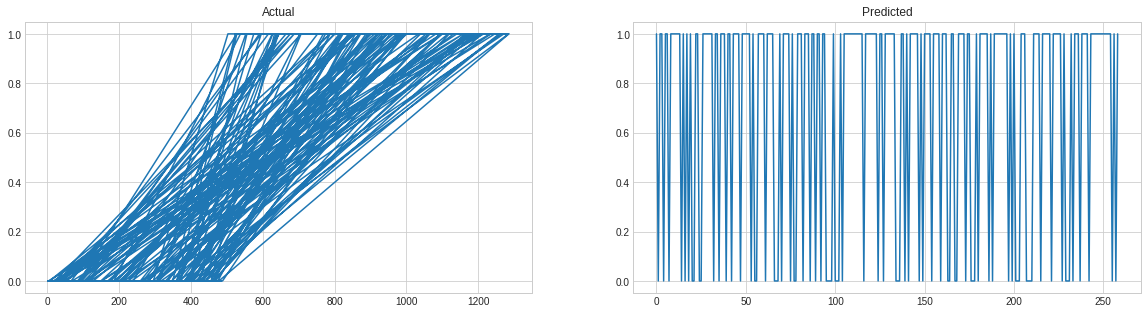

In [23]:
#subplots returns a Figure and an Axes object 
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5)) 

#manipulating the first Axes 
ax[0].plot(expected)  
ax[0].set_title('Actual') 

#manipulating the second Axes 
ax[1].plot(predictions)  
ax[1].set_title('Predicted') 

#save and display the plot 
# plt.savefig('C:\\Users\\Dell\\Desktop\\AV Plotting images\\matplotlib_plotting_11.png',dpi=300,bbox_inches='tight') 
plt.show();